### 가이드북

#### 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('final_data2.csv')

#### 데이터 확인

In [3]:
data.columns

Index(['No_Shot', 'Machine_Cycle_Time', 'Cycle_Time', 'Barrel_Temp_Z1',
       'Barrel_Temp_Z2', 'Barrel_Temp_Z3', 'Barrel_Temp_Z4', 'Hopper_Temp',
       'Injection_Pressure_Real_Time', 'Screw_Position',
       'Injection_Peak_Press', 'Max_Injection_Rate', 'Screw_Velocity',
       'VP_Time', 'VP_Position', 'VP_Press', 'Plasticizing_Time',
       'Plasticizing_Start_Position', 'Plasticizing_End_Position',
       'Plasticizing_RPM', 'Cooling_Time', 'Back_Flow', 'Decompression_Time',
       'Lot', 'label'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030414 entries, 0 to 1030413
Data columns (total 25 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   No_Shot                       1030414 non-null  int64  
 1   Machine_Cycle_Time            1030414 non-null  float64
 2   Cycle_Time                    1030414 non-null  float64
 3   Barrel_Temp_Z1                1030414 non-null  float64
 4   Barrel_Temp_Z2                1030414 non-null  float64
 5   Barrel_Temp_Z3                1030414 non-null  float64
 6   Barrel_Temp_Z4                1030414 non-null  float64
 7   Hopper_Temp                   1030414 non-null  float64
 8   Injection_Pressure_Real_Time  1030414 non-null  float64
 9   Screw_Position                1030414 non-null  float64
 10  Injection_Peak_Press          1030414 non-null  float64
 11  Max_Injection_Rate            1030414 non-null  float64
 12  Screw_Velocity              

In [5]:
data.count()

No_Shot                         1030414
Machine_Cycle_Time              1030414
Cycle_Time                      1030414
Barrel_Temp_Z1                  1030414
Barrel_Temp_Z2                  1030414
Barrel_Temp_Z3                  1030414
Barrel_Temp_Z4                  1030414
Hopper_Temp                     1030414
Injection_Pressure_Real_Time    1030414
Screw_Position                  1030414
Injection_Peak_Press            1030414
Max_Injection_Rate              1030414
Screw_Velocity                  1030414
VP_Time                         1030414
VP_Position                     1030414
VP_Press                        1030414
Plasticizing_Time               1030414
Plasticizing_Start_Position     1030414
Plasticizing_End_Position       1030414
Plasticizing_RPM                1030414
Cooling_Time                    1030414
Back_Flow                       1030414
Decompression_Time              1030414
Lot                             1030414
label                           1030414


#### 데이터 전처리

결측치 처리

In [6]:
# 결측치 처리
print('결측치 개수:',data[data.isnull()==True].count().sum())

결측치 개수: 0


#### 데이터 특성 파악

데이터 시각화

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

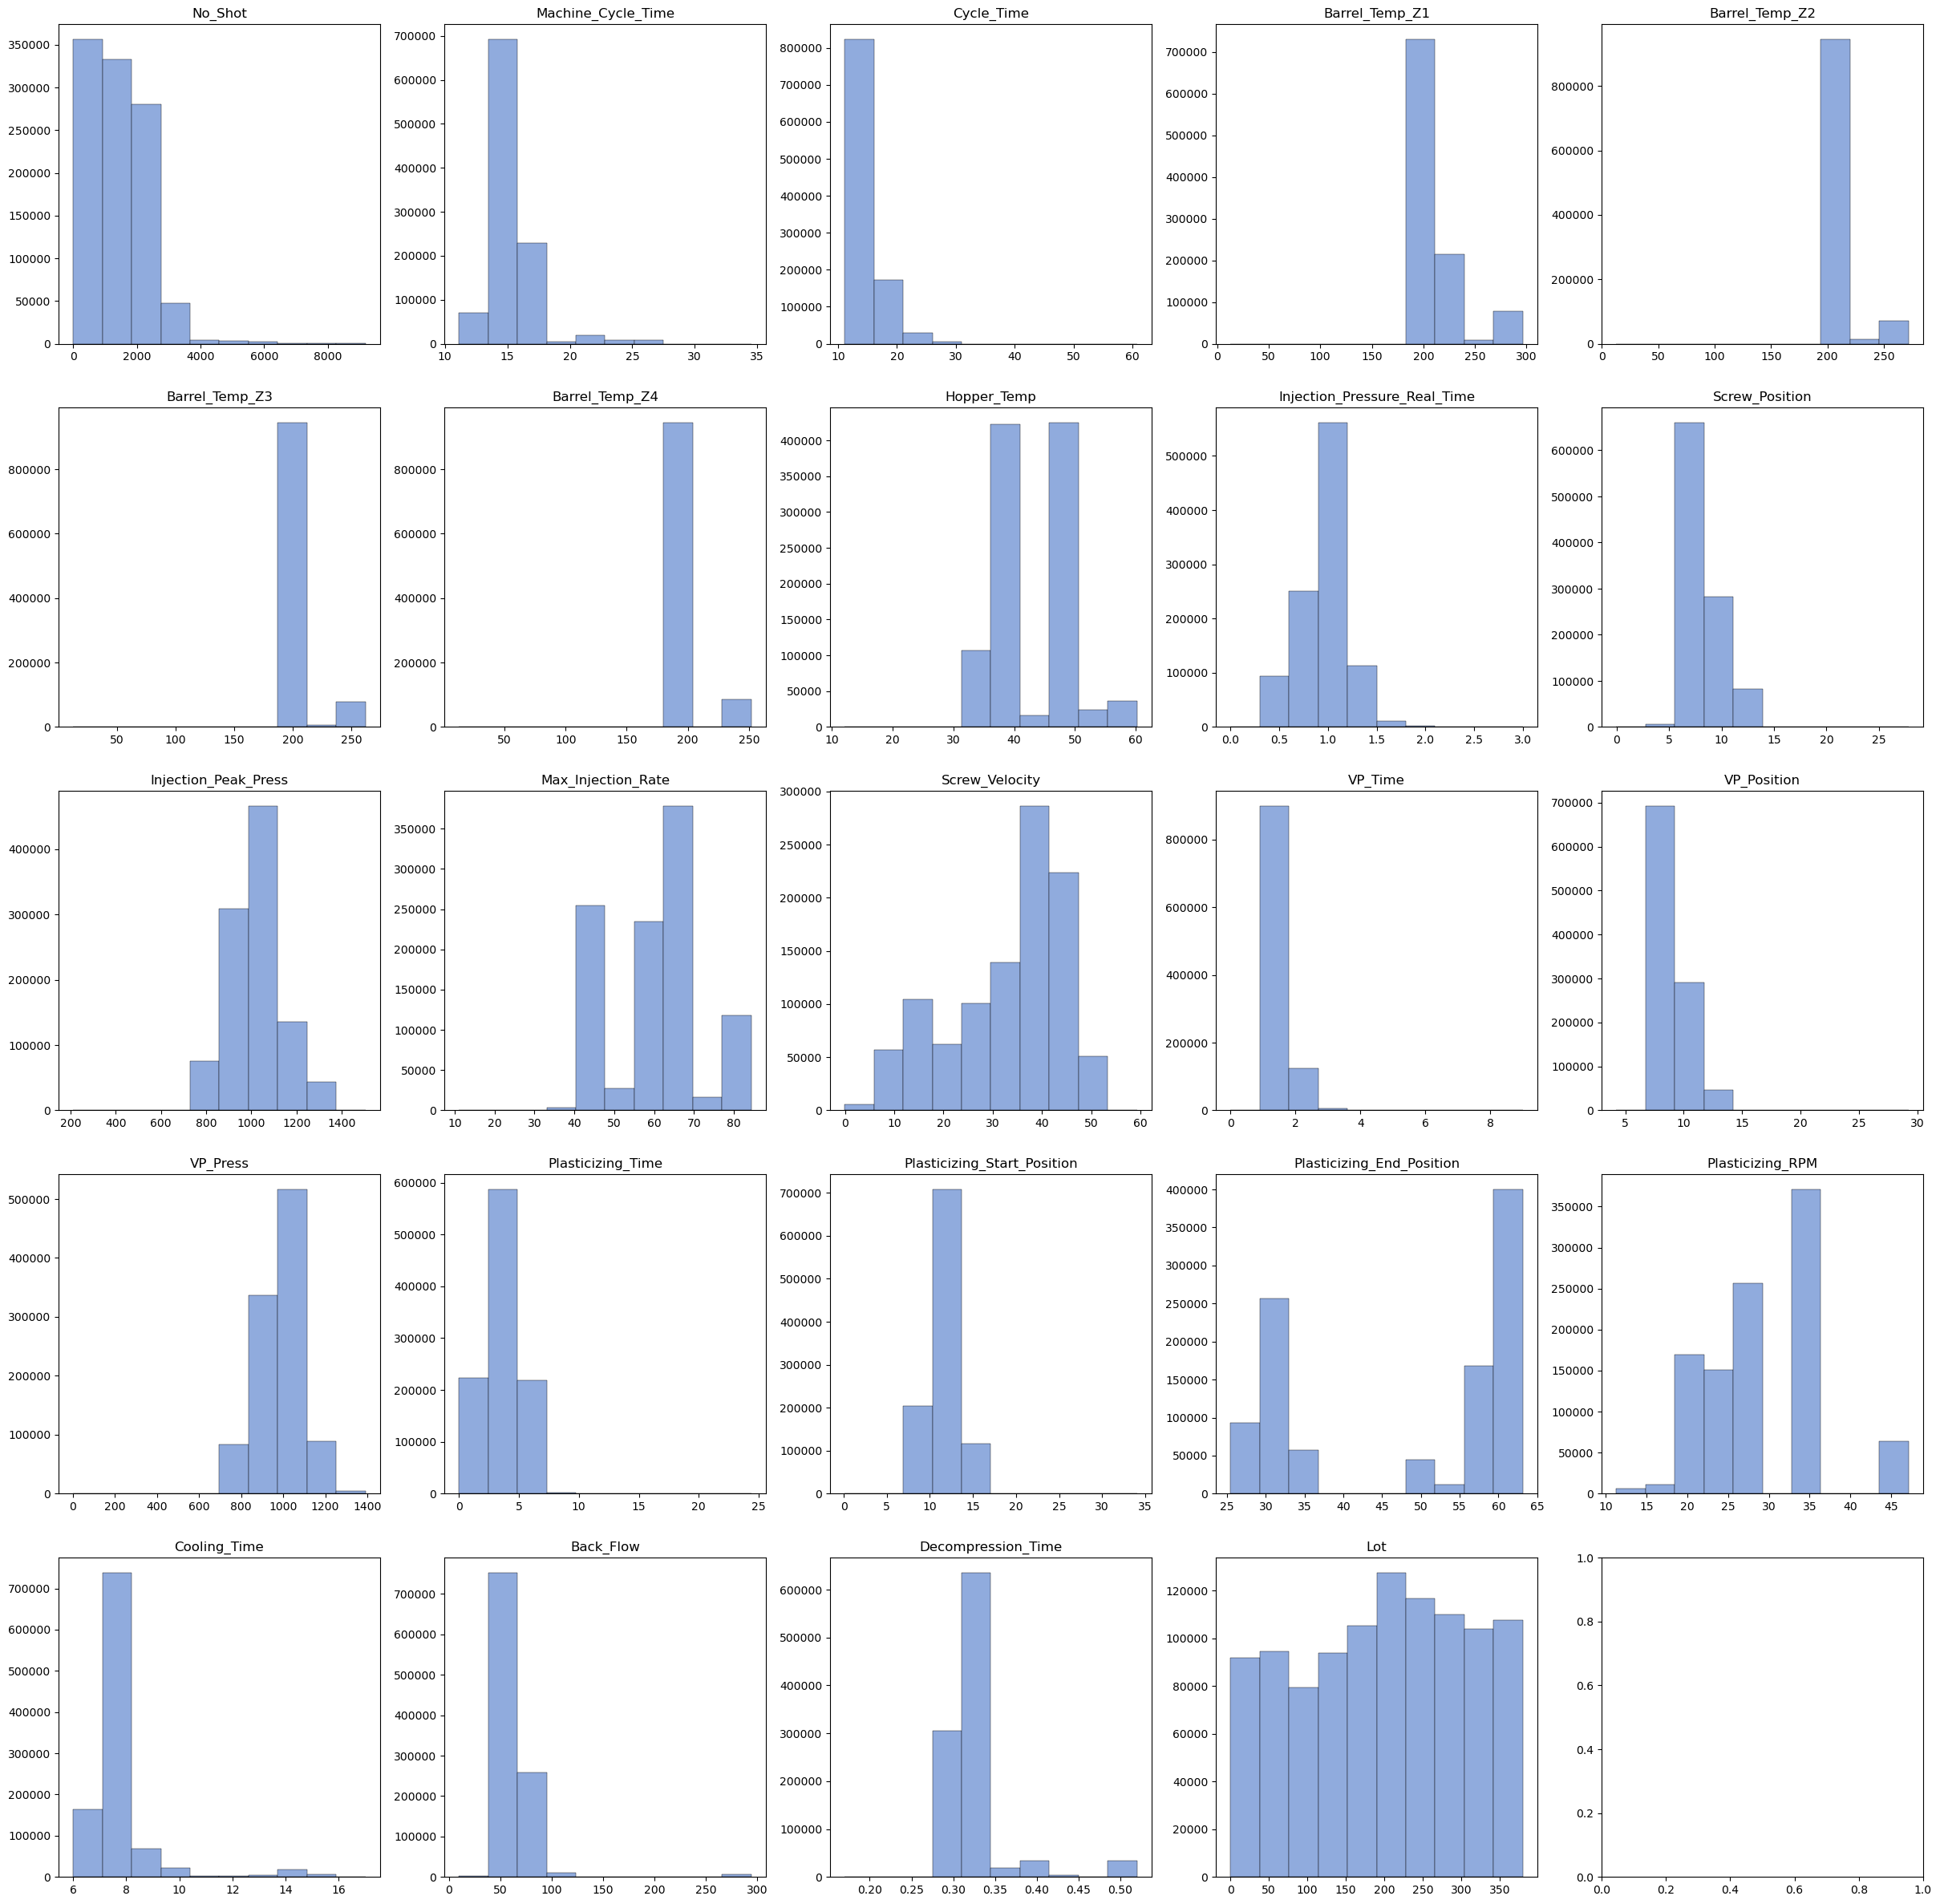

In [8]:
# 히스토그램 시각화
plt.figure(figsize=(30,30))

for index, value in enumerate(data):
    sub = plt.subplot(5,5,index+1)
    sub.hist(data[value], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor='black')
    plt.title(value)

데이터 상관분석

<Axes: >

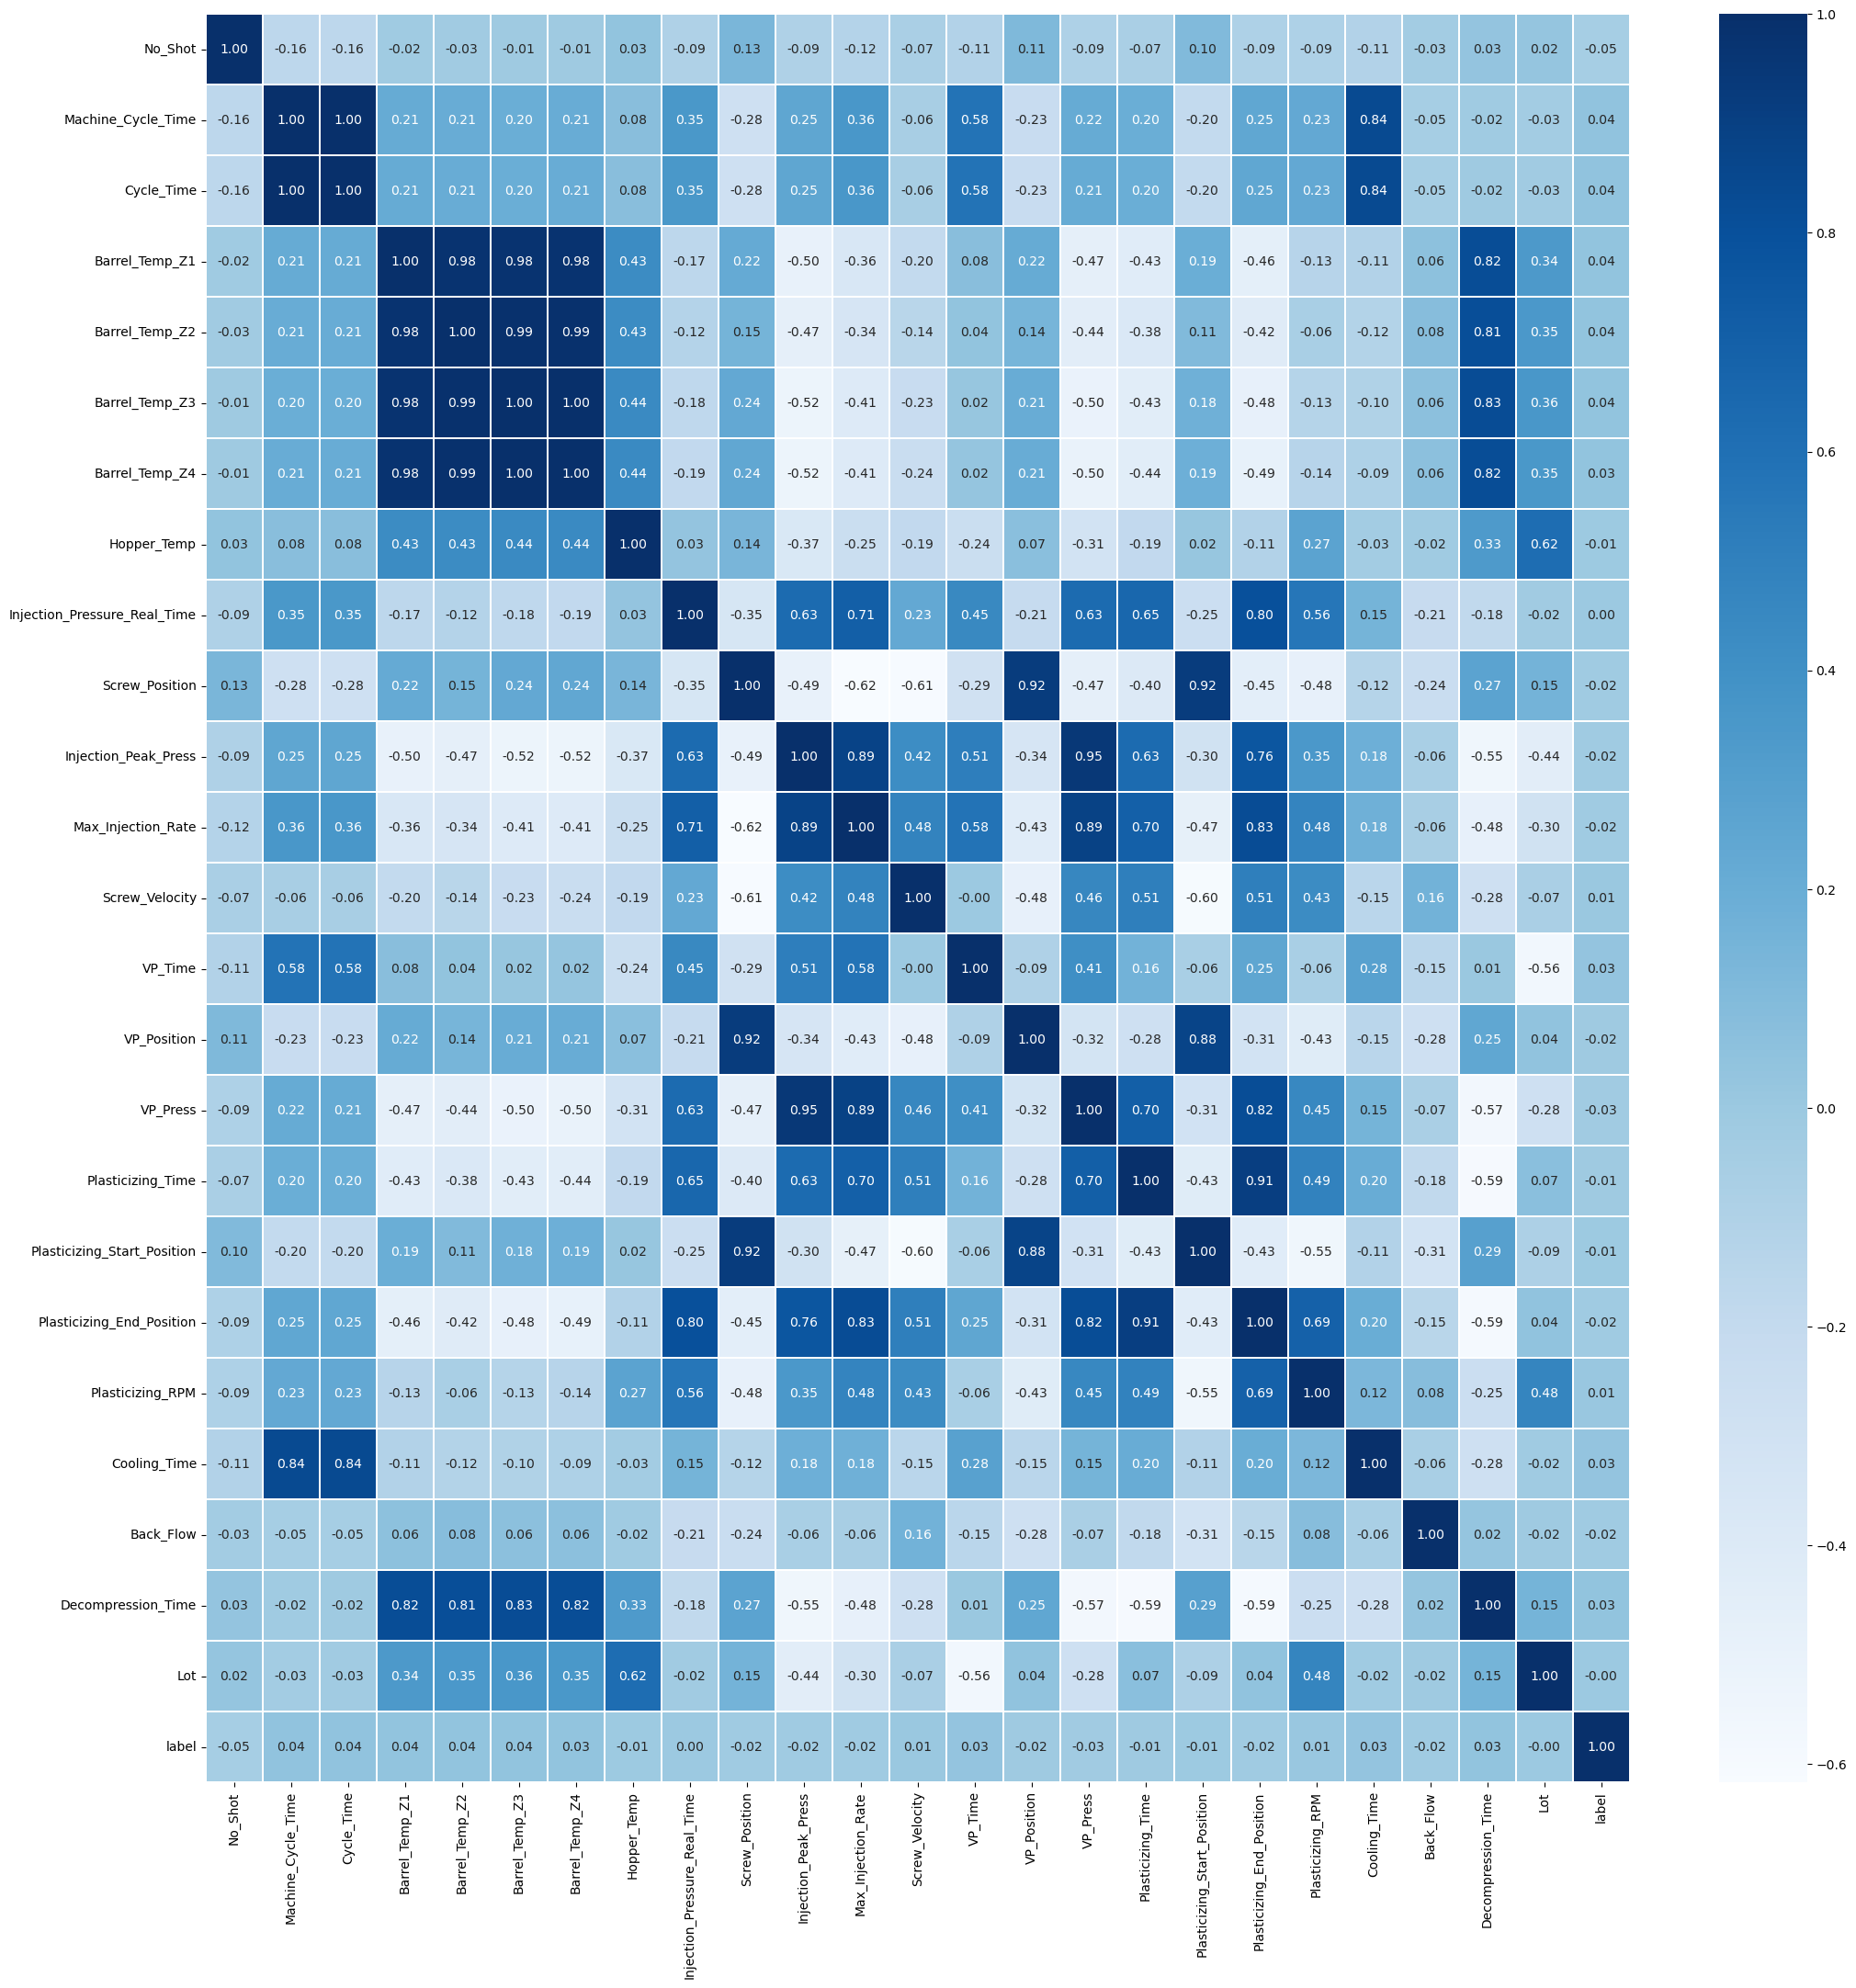

In [9]:
# 상관계수 시각화
plt.subplots(figsize=(25,25))
sns.heatmap(data = data.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

In [12]:
# 라벨링 갯수 비교
data['label'].value_counts()

False    1002137
True       28277
Name: label, dtype: int64

In [13]:
# 분석에 영향을 끼칠 수 있는  컬럼을 drop()함수를 통해 삭제

data = data.drop(columns=['No_Shot', 'Lot'])

In [14]:
data.columns

Index(['Machine_Cycle_Time', 'Cycle_Time', 'Barrel_Temp_Z1', 'Barrel_Temp_Z2',
       'Barrel_Temp_Z3', 'Barrel_Temp_Z4', 'Hopper_Temp',
       'Injection_Pressure_Real_Time', 'Screw_Position',
       'Injection_Peak_Press', 'Max_Injection_Rate', 'Screw_Velocity',
       'VP_Time', 'VP_Position', 'VP_Press', 'Plasticizing_Time',
       'Plasticizing_Start_Position', 'Plasticizing_End_Position',
       'Plasticizing_RPM', 'Cooling_Time', 'Back_Flow', 'Decompression_Time',
       'label'],
      dtype='object')

데이터 2차 데이터 전처리

In [16]:
scaler = MinMaxScaler()


data = scaler.fit_transform(data)

data = pd.DataFrame(data)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.231624,0.108827,0.696082,0.725657,0.725411,0.730238,0.582121,0.410000,0.217235,0.773513,...,0.156275,0.763308,0.194501,0.305040,0.999469,0.473611,0.181818,0.137909,0.428571,0.0
1,0.232479,0.109230,0.696082,0.726043,0.725411,0.729820,0.584200,0.413333,0.217235,0.773513,...,0.156275,0.763308,0.197374,0.305924,0.999469,0.473611,0.181818,0.137909,0.428571,0.0
2,0.233333,0.109633,0.695729,0.725657,0.725411,0.729820,0.584200,0.420000,0.217235,0.771588,...,0.155476,0.791662,0.196963,0.307103,0.999469,0.473611,0.181818,0.137909,0.428571,0.0
3,0.235043,0.110036,0.695729,0.725270,0.725411,0.729820,0.584200,0.433333,0.226571,0.786339,...,0.155476,0.785287,0.198605,0.314471,0.999469,0.473611,0.181818,0.137909,0.457143,0.0
4,0.235043,0.110842,0.695376,0.724884,0.725010,0.730238,0.582121,0.436667,0.233034,0.831853,...,0.154676,0.829073,0.199426,0.319187,0.999469,0.473611,0.181818,0.137909,0.457143,0.0


데이터 분리

In [17]:
# normal shot
df_Y_scaler = data[data[22]==0]
print('normal shot:', len(df_Y_scaler))
# abnormal shot
df_N_scaler = data[data[22]==1]
print('abnormal shot:', len(df_N_scaler))

normal shot: 1002137
abnormal shot: 28277


In [18]:
# ‘PassOrFail’ 변수 제거
df_Y_scaler = df_Y_scaler.drop(columns=[22])
df_N_scaler = df_N_scaler.drop(columns=[22])

오토인코더 모델에 학습시킬 데이터의 형태는 클래스 변수가 없어야 하므로 변수
(‘PassOrFail’)를 제거한다.

In [19]:
# 학습 데이터, 평가데이터(normal shot)
Y_train, Y_test = train_test_split(df_Y_scaler, test_size = 0.3, random_state = 1234)
# 평가 데이터(abnromal shot)
N_test = df_N_scaler
print('normal 학습 데이터셋 개수:', len(Y_train))
print('normal 평가 데이터셋 개수:', len(Y_test))
print('abnormal 평가 데이터셋 개수:', len(N_test))

normal 학습 데이터셋 개수: 701495
normal 평가 데이터셋 개수: 300642
abnormal 평가 데이터셋 개수: 28277


- 본 분석에서는 오토인코더 모델에 normal 데이터만 학습에 활용할 예정이므로,
normal과 abnormal 데이터 분리가 필수적이다. df_Y_scaler는 normal 데이터만,
df_N_scaler는 abnormal 데이터만 포함하게 된다. df_Y_scaler는 학습데이터인
Y_train과 평가 데이터인 Y_test로 나눠서 저장하고 df_N_scaler는 평가 데이터인
N_test로 저장해서 AI 모델 훈련에 사용하게 된다.
- 단순 슬라이싱으로 데이터를 분리하면 특정 데이터만 학습이 될 수 있기 때문에
sklearn의 train_test_split을 통해 데이터를 임의로 나눠서 분리하게 한다. test_size
는 분리하는 전체 데이터의 비율을 의미하고, random_state는 재현 가능하도록 난
수의 초기 값을 설정해두는 것이기 때문에 다른 결과를 원하면 다르게 설정한다.

#### AI 모델 구축

In [20]:
# 인코더
dropout_encoder = Sequential([
Dropout(0.3),
Dense(15, activation="relu"), # 첫 번째 은닉층
Dense(5, activation="relu") # 두 번째 은닉층
])
# 디코더
dropout_decoder = Sequential([
Dense(15, activation="relu", input_shape=[5]), # 세 번째 은닉층
Dense(Y_train.shape[1], activation='relu'), # 출력
])
dropout_AE = Sequential([dropout_encoder, dropout_decoder])

- Tensorflow Keras package의 Sequential 모델을 사용하여 순서대로 연결된 층
을 일렬로 쌓아서 구성한다. 인코더와 디코더, 두 개를 합친 오토인코더 모델을 구
성할 때 Sequential을 사용한다. 훈련에 필요한 계산과 모델을 표현한 구조를 구성
하는 과정에서 입력층, 은닉층, 출력층의 크기와 학습 속도 및 드롭아웃 비율을 직접
설정해줄 수 있으며, 이렇게 직접 설정해주는 파라미터를 하이퍼 파라미터 (hyperparameter)
라고 한다.
- 첫 번째 레이어로 Dropout 은닉층을 추가하고 드롭아웃 비율을 0.3 으로 설정한다.
뉴런을 15개 혹은 5개를 가진 Dense 은닉층을 추가하고, ‘Relu’ 활성화 함수를 사용
하여 층마다 각자 가중치 행렬을 관리하도록 한다.
- ‘Relu’는 0보다 작은 입력은 0으로 만들고, 0보다 큰 입력은 그대로 내보내게 되면서
연산 비용을 줄임으로써 빠른 학습을 가능하게 한다.

In [21]:
# 손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# 모델 훈련
history = dropout_AE.fit(Y_train, Y_train, batch_size=30, epochs=30, validation_split=0.2,
                        callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode="min")])

Epoch 1/30
18707/18707 [==============================] - 34s 2ms/step - loss: 0.0043 - accuracy: 0.6961 - val_loss: 0.0123 - val_accuracy: 0.2750
Epoch 2/30
18707/18707 [==============================] - 31s 2ms/step - loss: 0.0032 - accuracy: 0.7412 - val_loss: 0.0095 - val_accuracy: 0.2808
Epoch 3/30
18707/18707 [==============================] - 32s 2ms/step - loss: 0.0031 - accuracy: 0.7514 - val_loss: 0.0080 - val_accuracy: 0.6186
Epoch 4/30
18707/18707 [==============================] - 30s 2ms/step - loss: 0.0031 - accuracy: 0.7511 - val_loss: 0.0154 - val_accuracy: 0.2368
Epoch 5/30
18707/18707 [==============================] - 30s 2ms/step - loss: 0.0031 - accuracy: 0.7527 - val_loss: 0.0151 - val_accuracy: 0.1966
Epoch 6/30
18707/18707 [==============================] - 30s 2ms/step - loss: 0.0031 - accuracy: 0.7586 - val_loss: 0.0132 - val_accuracy: 0.2789
Epoch 7/30
18707/18707 [==============================] - 30s 2ms/step - loss: 0.0031 - accuracy: 0.7535 - val_loss: 0

- 모델을 만들고 나서 compile() 메서드를 호출하여 손실 함수로는 평균 제곱 오차
(Mean Squared Error, MSE)를 사용하고, 옵티마이저로는 Adam을 사용한다. 훈련
과 평가 시에 정확도를 측정하기 위해 “accuracy”로 평가 지표로 설정한다.
- 모델을 훈련하기 위해서 fit() 메서드를 호출한다. 복원 모델이기 때문에 입력과 출력
모두 동일하게 normal의 학습 데이터(Y_train)로 설정한다. 데이터를 작은 묶은 단
위로 쪼갠 미니배치(mini-batch)를 순차적으로 모델에 주입하는 것이 한 번에 모든
학습 데이터를 주입하는 것보다 빠르고 적은 비용(손실)으로 학습할 수 있다. 배치 크
기를 30개로 설정함으로써 데이터를 30개씩 쪼개고, 에포크 (epoch)를 30으로 두어
모델을 30번 학습시킨다. 검증 데이터는 학습 데이터의 20%를 사용한다. 학습 에포
크마다 처리한 데이터 개수와 데이터마다 걸린 평균 학습 시간, 학습 데이터와 검증
데이터에 대한 손실과 정확도를 출력한다.
- 콜백(callback)은 모델의 fit() 메서드가 호출될 때 전달되는 객체이다. 훈련하는 동안
모델은 여러 지점에서 콜백을 호출하여 모델의 상태와 성능에 대한 모든 정보에 접근
하고 훈련을 중지하거나 모델을 저장하고, 가중치를 적재하거나 모델 상태를 변경할
수 있다. 이 모델에서는 케라스 콜백 함수의 조기종료(early stopping)를 사용하여 검
증 손실값이 더이상 향상되지 않을 때 훈련을 중지한다.
- monitor는 관찰하고자 하는 항목이고, 검증 손실값이나 검증 정확도인 ‘val_loss’나
‘val_acc’가 주로 사용된다.
- patience는 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려
줄 것인가를 지정하는 값이다.
- mode는 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준이며, 관찰 항목이 ‘val_
loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로 ‘min’으로 설정한다.

#### 결과 분석

In [22]:
# 학습 데이터의 예측값
train_pred = dropout_AE.predict(Y_train)
# 학습 데이터의 복원 오차 (예측값 실제값)
train_loss = np.mean(np.square(train_pred-Y_train),axis=1)
# 임계치
threshold = np.mean(train_loss) + 5*np.std(train_loss)
print("복원 오류 임계치:", threshold)

21922/21922 [==============================] - 19s 833us/step
복원 오류 임계치: 0.05548798289998458


In [23]:
# 예측값
predict_Y = dropout_AE.predict(Y_test)
# normal 평가 데이터의 복원 오차 (예측값 실제값)
test_Y_mse = np.mean(np.square(predict_Y - Y_test),axis=1)
# normal로 판단한 데이터 확인
test_Y_anomalies = test_Y_mse > threshold
print("normal로 판단한 데이터 확인:\n", test_Y_anomalies)

9396/9396 [==============================] - 9s 945us/step
normal로 판단한 데이터 확인:
 725252    False
23050     False
259167    False
4656      False
600835    False
          ...  
640499    False
528402    False
576898    False
847141    False
108035    False
Length: 300642, dtype: bool


In [24]:
# 예측값
predict_N = dropout_AE.predict(df_N_scaler)
# abnormal 평가 데이터의 복원 오차 (예측값 실제값)
test_N_mse = np.mean(np.square(predict_N, df_N_scaler), axis=1)
# abnormal로 판단한 데이터 확인
test_N_anomalies = test_N_mse > threshold
print("abnormal로 판단한 데이터 확인:\n", test_N_anomalies)

884/884 [==============================] - 1s 857us/step
abnormal로 판단한 데이터 확인:
 6          True
9          True
10         True
11         True
12         True
           ... 
1029991    True
1030057    True
1030163    True
1030225    True
1030240    True
Length: 28277, dtype: bool


In [25]:
true = np.concatenate([np.zeros(len(test_Y_anomalies)), np.ones(len(test_N_anomalies))])
prediction = np.concatenate([test_Y_anomalies, test_N_anomalies])
accuracy = np.round(accuracy_score(true,prediction), 4)
recall = np.round(recall_score(true,prediction,pos_label=0), 4)
precision = np.round(precision_score(true,prediction,pos_label=0), 4)
f1_score = np.round((2*recall*precision/(recall+precision)), 4)
print(confusion_matrix(true,prediction))
print('정확도:', accuracy)
print('재현율:', recall)
print('정밀도:', precision)
print('f1-score', f1_score)

[[300135    507]
 [     0  28277]]
정확도: 0.9985
재현율: 0.9983
정밀도: 1.0
f1-score 0.9991


#### 성능 개선

하이퍼 파라미터 조절

In [26]:
# 노드 22, 11 drop out = 0.3, patience = 8, threshold = 1.5
# 정확도 정밀도가 높아지고, 혼동행렬을 통해 abnormal과 normal을 고루 잡아낼 수 있는것을 확인
# 인코더
dropout_encoder=Sequential([
Dropout(0.3),
Dense(22, activation="relu"), # 첫 번째 은닉층
Dense(11, activation="relu") # 두 번째 은닉층
])
# 디코더
dropout_decoder=Sequential([
Dense(22, activation="relu", input_shape=[11]), # 세 번째 은닉층
Dense(Y_train.shape[1], activation='relu'), # 출력
])
dropout_AE = Sequential([dropout_encoder, dropout_decoder])

In [27]:
# 손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
# 모델 훈련
history = dropout_AE.fit(Y_train, Y_train, batch_size=30, epochs=30, validation_split=0.2,
callbacks=[EarlyStopping(monitor="val_loss", patience=8, mode="min")])

Epoch 1/30
18707/18707 [==============================] - 31s 2ms/step - loss: 0.0067 - accuracy: 0.7222 - val_loss: 0.0077 - val_accuracy: 0.3135
Epoch 2/30
18707/18707 [==============================] - 23s 1ms/step - loss: 0.0024 - accuracy: 0.7749 - val_loss: 0.0091 - val_accuracy: 0.2477
Epoch 3/30
18707/18707 [==============================] - 316s 17ms/step - loss: 0.0024 - accuracy: 0.7841 - val_loss: 0.0124 - val_accuracy: 0.1891
Epoch 4/30
18707/18707 [==============================] - 121s 6ms/step - loss: 0.0024 - accuracy: 0.7872 - val_loss: 0.0084 - val_accuracy: 0.2366
Epoch 5/30
18707/18707 [==============================] - 19s 1ms/step - loss: 0.0024 - accuracy: 0.7749 - val_loss: 0.0098 - val_accuracy: 0.1907
Epoch 6/30
18707/18707 [==============================] - 19s 1ms/step - loss: 0.0024 - accuracy: 0.7683 - val_loss: 0.0097 - val_accuracy: 0.1845
Epoch 7/30
18707/18707 [==============================] - 19s 1ms/step - loss: 0.0024 - accuracy: 0.7725 - val_loss

In [28]:
# 학습 데이터의 예측값
train_pred = dropout_AE.predict(Y_train)
# 학습 데이터의 복원 오차 (예측값 실제값)
train_loss = np.mean(np.square(train_pred-Y_train), axis=1)
# 임계치
threshold = np.mean(train_loss) + 1.5*np.std(train_loss)
print("복원 오류 임계치:", threshold)

21922/21922 [==============================] - 14s 633us/step
복원 오류 임계치: 0.02153030048413862


In [29]:
# 예측값
predict_Y = dropout_AE.predict(Y_test)
# normal 평가 데이터의 복원 오차 (예측값 실제값)
test_Y_mse = np.mean(np.square(predict_Y, Y_test), axis=1) # normal로 판단한 데이터 확인
test_Y_anomalies = test_Y_mse > threshold
print("normal로 판단한 데이터 확인:\n", test_Y_anomalies)

9396/9396 [==============================] - 6s 628us/step
normal로 판단한 데이터 확인:
 725252    True
23050     True
259167    True
4656      True
600835    True
          ... 
640499    True
528402    True
576898    True
847141    True
108035    True
Length: 300642, dtype: bool


In [30]:
# 예측값
predict_N = dropout_AE.predict(df_N_scaler)
# abnormal 평가 데이터의 복원 오차 (예측값 실제값)
test_N_mse = np.mean(np.square(predict_N, df_N_scaler), axis=1)
# abnormal로 판단한 데이터 확인
test_N_anomalies = test_N_mse > threshold
print("abnormal로 판단한 데이터 확인:\n", test_N_anomalies)

884/884 [==============================] - 1s 616us/step
abnormal로 판단한 데이터 확인:
 6          True
9          True
10         True
11         True
12         True
           ... 
1029991    True
1030057    True
1030163    True
1030225    True
1030240    True
Length: 28277, dtype: bool


In [31]:
true = np.concatenate([np.zeros(len(test_Y_anomalies)), np.ones(len(test_N_anomalies))])
prediction = np.concatenate([test_Y_anomalies, test_N_anomalies])
accuracy = np.round(accuracy_score(true,prediction), 4)
recall = np.round(recall_score(true,prediction,pos_label=0), 4)
precision = np.round(precision_score(true,prediction,pos_label=0), 4)
f1_score = np.round((2*recall*precision/(recall+precision)), 4)
print(confusion_matrix(true,prediction))
print('정확도:', accuracy)
print('재현율:', recall)
print('정밀도:', precision)
print('f1-score', f1_score)

[[     0 300642]
 [     0  28277]]
정확도: 0.086
재현율: 0.0
정밀도: 0.0
f1-score nan


C:\Users\hanji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hanji\AppData\Local\Temp\ipykernel_15004\3649708179.py:6: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = np.round((2*recall*precision/(recall+precision)), 4)


k-fold 교차검증

In [32]:
# 파라미터가 조절된 모델을 교차검증 하기 위해 k-fold validation사용
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
dropout_AE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])
cv_confusion_matrix = np.array([[0,0],[0,0]])
cv_accuracy = []
cv_recall = []
cv_precision = []
cv_f1_score = []
n_iter = 0

In [33]:
for train_index, test_index in kf.split(np.array(df_Y_scaler)):
    X_train, X_test = np.array(df_Y_scaler)[train_index], np.array(df_Y_scaler)[test_index]
    history = dropout_AE.fit(X_train, X_train, batch_size=30, epochs=30, validation_split=0.2,
        callbacks=[EarlyStopping(monitor="val_loss", patience=8, mode="min")])
    n_iter += 1
    # 학습 데이터의 예측값
    train_pred = dropout_AE.predict(X_train)
    # 학습 데이터의 복원 오차 (예측값 실제값)
    train_loss = np.mean(np.square(train_pred, X_train), axis=1)
    # 임계치
    threshold = np.mean(train_loss) + 1.5*np.std(train_loss)
    # 예측값
    predict_Y = dropout_AE.predict(X_test)
    # narmal 평가 데이터의 복원 오차 (예측값 실제값)
    test_Y_mse = np.mean(np.square(predict_Y-X_test), axis=1)
    # abnormal로 판단한 데이터 확인
    test_Y_anomalies = test_Y_mse > threshold
    # 예측값
    predict_N = dropout_AE.predict(df_N_scaler)
    # abnormal 평가 데이터의 복원 오차 (예측값 실제값)
    test_N_mse = np.mean(np.square(predict_N, df_N_scaler), axis=1)
    # abnormal로 판단한 데이터 확인
    test_N_anomalies = test_N_mse > threshold
    true = np.concatenate([np.zeros(len(test_Y_anomalies)), np.ones(len(test_N_anomalies))])
    prediction = np.concatenate([test_Y_anomalies, test_N_anomalies])
    accuracy = np.round(accuracy_score(true, prediction), 4)
    recall = np.round(recall_score(true, prediction, pos_label=0), 4)
    precision = np.round(precision_score(true, prediction, pos_label = 0), 4)
    f1_score = np.round((2*recall*precision/(recall+precision)), 4)
    cv_confusion_matrix = cv_confusion_matrix + confusion_matrix(true, prediction)
    cv_accuracy.append(accuracy)
    cv_recall.append(recall)
    cv_precision.append(precision)
    cv_f1_score.append(f1_score)
    print('\n회차:', n_iter)
    print(confusion_matrix(true, prediction))
    print('정확도:', accuracy)
    print('재현율:', recall)
    print('정밀도:', precision)
    print('f1-score:', f1_score)
    print('\n')

Epoch 1/30
21379/21379 [==============================] - 22s 982us/step - loss: 0.0016 - accuracy: 0.8326 - val_loss: 0.0186 - val_accuracy: 0.2080
Epoch 2/30
21379/21379 [==============================] - 21s 971us/step - loss: 0.0015 - accuracy: 0.8381 - val_loss: 0.0184 - val_accuracy: 0.2153
Epoch 3/30
21379/21379 [==============================] - 21s 974us/step - loss: 0.0014 - accuracy: 0.8389 - val_loss: 0.0199 - val_accuracy: 0.0374
Epoch 4/30
21379/21379 [==============================] - 21s 976us/step - loss: 0.0014 - accuracy: 0.8399 - val_loss: 0.0187 - val_accuracy: 0.1389
Epoch 5/30
21379/21379 [==============================] - 21s 976us/step - loss: 0.0014 - accuracy: 0.8415 - val_loss: 0.0195 - val_accuracy: 0.1350
Epoch 6/30
21379/21379 [==============================] - 21s 975us/step - loss: 0.0014 - accuracy: 0.8417 - val_loss: 0.0181 - val_accuracy: 0.2114
Epoch 7/30
21379/21379 [==============================] - 21s 975us/step - loss: 0.0014 - accuracy: 0.8418

21379/21379 [==============================] - 21s 966us/step - loss: 0.0013 - accuracy: 0.8322 - val_loss: 0.0203 - val_accuracy: 0.0098
Epoch 13/30
21379/21379 [==============================] - 21s 967us/step - loss: 0.0013 - accuracy: 0.8311 - val_loss: 0.0195 - val_accuracy: 0.0099
Epoch 14/30
21379/21379 [==============================] - 21s 968us/step - loss: 0.0013 - accuracy: 0.8324 - val_loss: 0.0199 - val_accuracy: 0.0093
Epoch 15/30
884/884 [==============================] - 1s 613us/step

회차: 4
[[200427      0]
 [ 28277      0]]
정확도: 0.8764
재현율: 1.0
정밀도: 0.8764
f1-score: 0.9341


Epoch 1/30
21379/21379 [==============================] - 21s 967us/step - loss: 0.0014 - accuracy: 0.8308 - val_loss: 0.0212 - val_accuracy: 0.0093
Epoch 2/30
21379/21379 [==============================] - 21s 968us/step - loss: 0.0014 - accuracy: 0.8297 - val_loss: 0.0212 - val_accuracy: 0.0105
Epoch 3/30
21379/21379 [==============================] - 21s 969us/step - loss: 0.0014 - accuracy: 0

In [34]:
# 평균 결과값 확인
print('k-fold 평균 결과')
print((cv_confusion_matrix/5).round())
print('평균 정확도:', round(np.mean(cv_accuracy), 4))
print('평균 재현율:', round(np.mean(cv_recall), 4))
print('평균 정밀도:', round(np.mean(cv_precision), 4))
print('평균 f1-score:', round(np.mean(cv_f1_score), 4))

k-fold 평균 결과
[[200427.      0.]
 [ 28277.      0.]]
평균 정확도: 0.8764
평균 재현율: 1.0
평균 정밀도: 0.8764
평균 f1-score: 0.9341
